In [7]:
import pandas as pd

In [19]:
A= pd.read_csv("/Users/OJAS KHAPRE/Desktop/DS-1/Air.csv",header=None)

In [15]:
A.head()

,1949-01,112
0,1949-02,118
1,1949-03,132
2,1949-04,129
3,1949-05,121
4,1949-06,135


In [20]:
A

,0,1
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [21]:
A.columns=["Month","pass"]

In [22]:
A

,Month,pass
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [23]:
A.index = pd.to_datetime(A.Month,format="%Y-%m")


In [24]:
A

,Month,pass
Month,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121
...,...,...
1960-08-01,1960-08,606
1960-09-01,1960-09,508
1960-10-01,1960-10,461


In [25]:
A = A.drop(labels=["Month"],axis=1)

In [26]:
A

,pass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


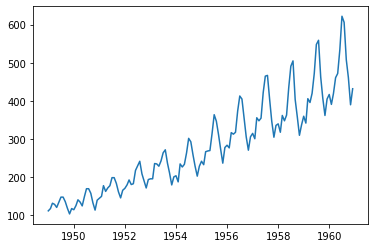

In [27]:
import matplotlib.pyplot as plt
plt.plot(A)

In [28]:
from statsmodels.api import tsa

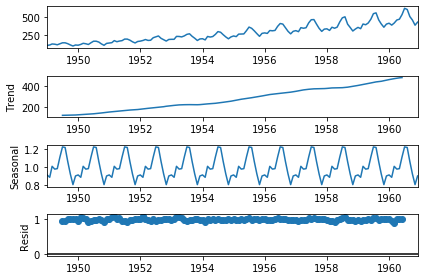

In [29]:
tsa.seasonal_decompose(A,model="multiplicative").plot()
plt.show()

In [31]:
A.columns = ["Pass"]

In [32]:
import numpy as np
B = np.log(A["Pass"])

In [33]:
B.head()

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: Pass, dtype: float64

In [34]:
from statsmodels.tsa.stattools import adfuller
adfuller(B)[1]

0.4223667747703857

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
sv = pd.DataFrame(ss.fit_transform(A[["Pass"]]))
sv.index= A.index

In [36]:
import numpy as np
B = np.sqrt(A.Pass)
from statsmodels.tsa.stattools import adfuller
adfuller(B)[1]

0.918754321761835

In [37]:
x = A.Pass
s = np.std(A.Pass)
u = np.mean(A.Pass)


In [38]:
z = (x - u) / s

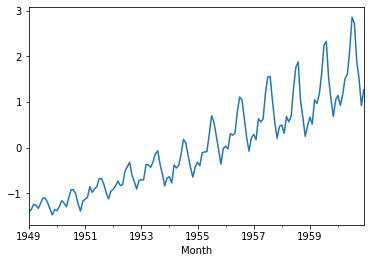

In [39]:
z.plot()

In [40]:
adfuller(z)[1]

0.9918802434376413

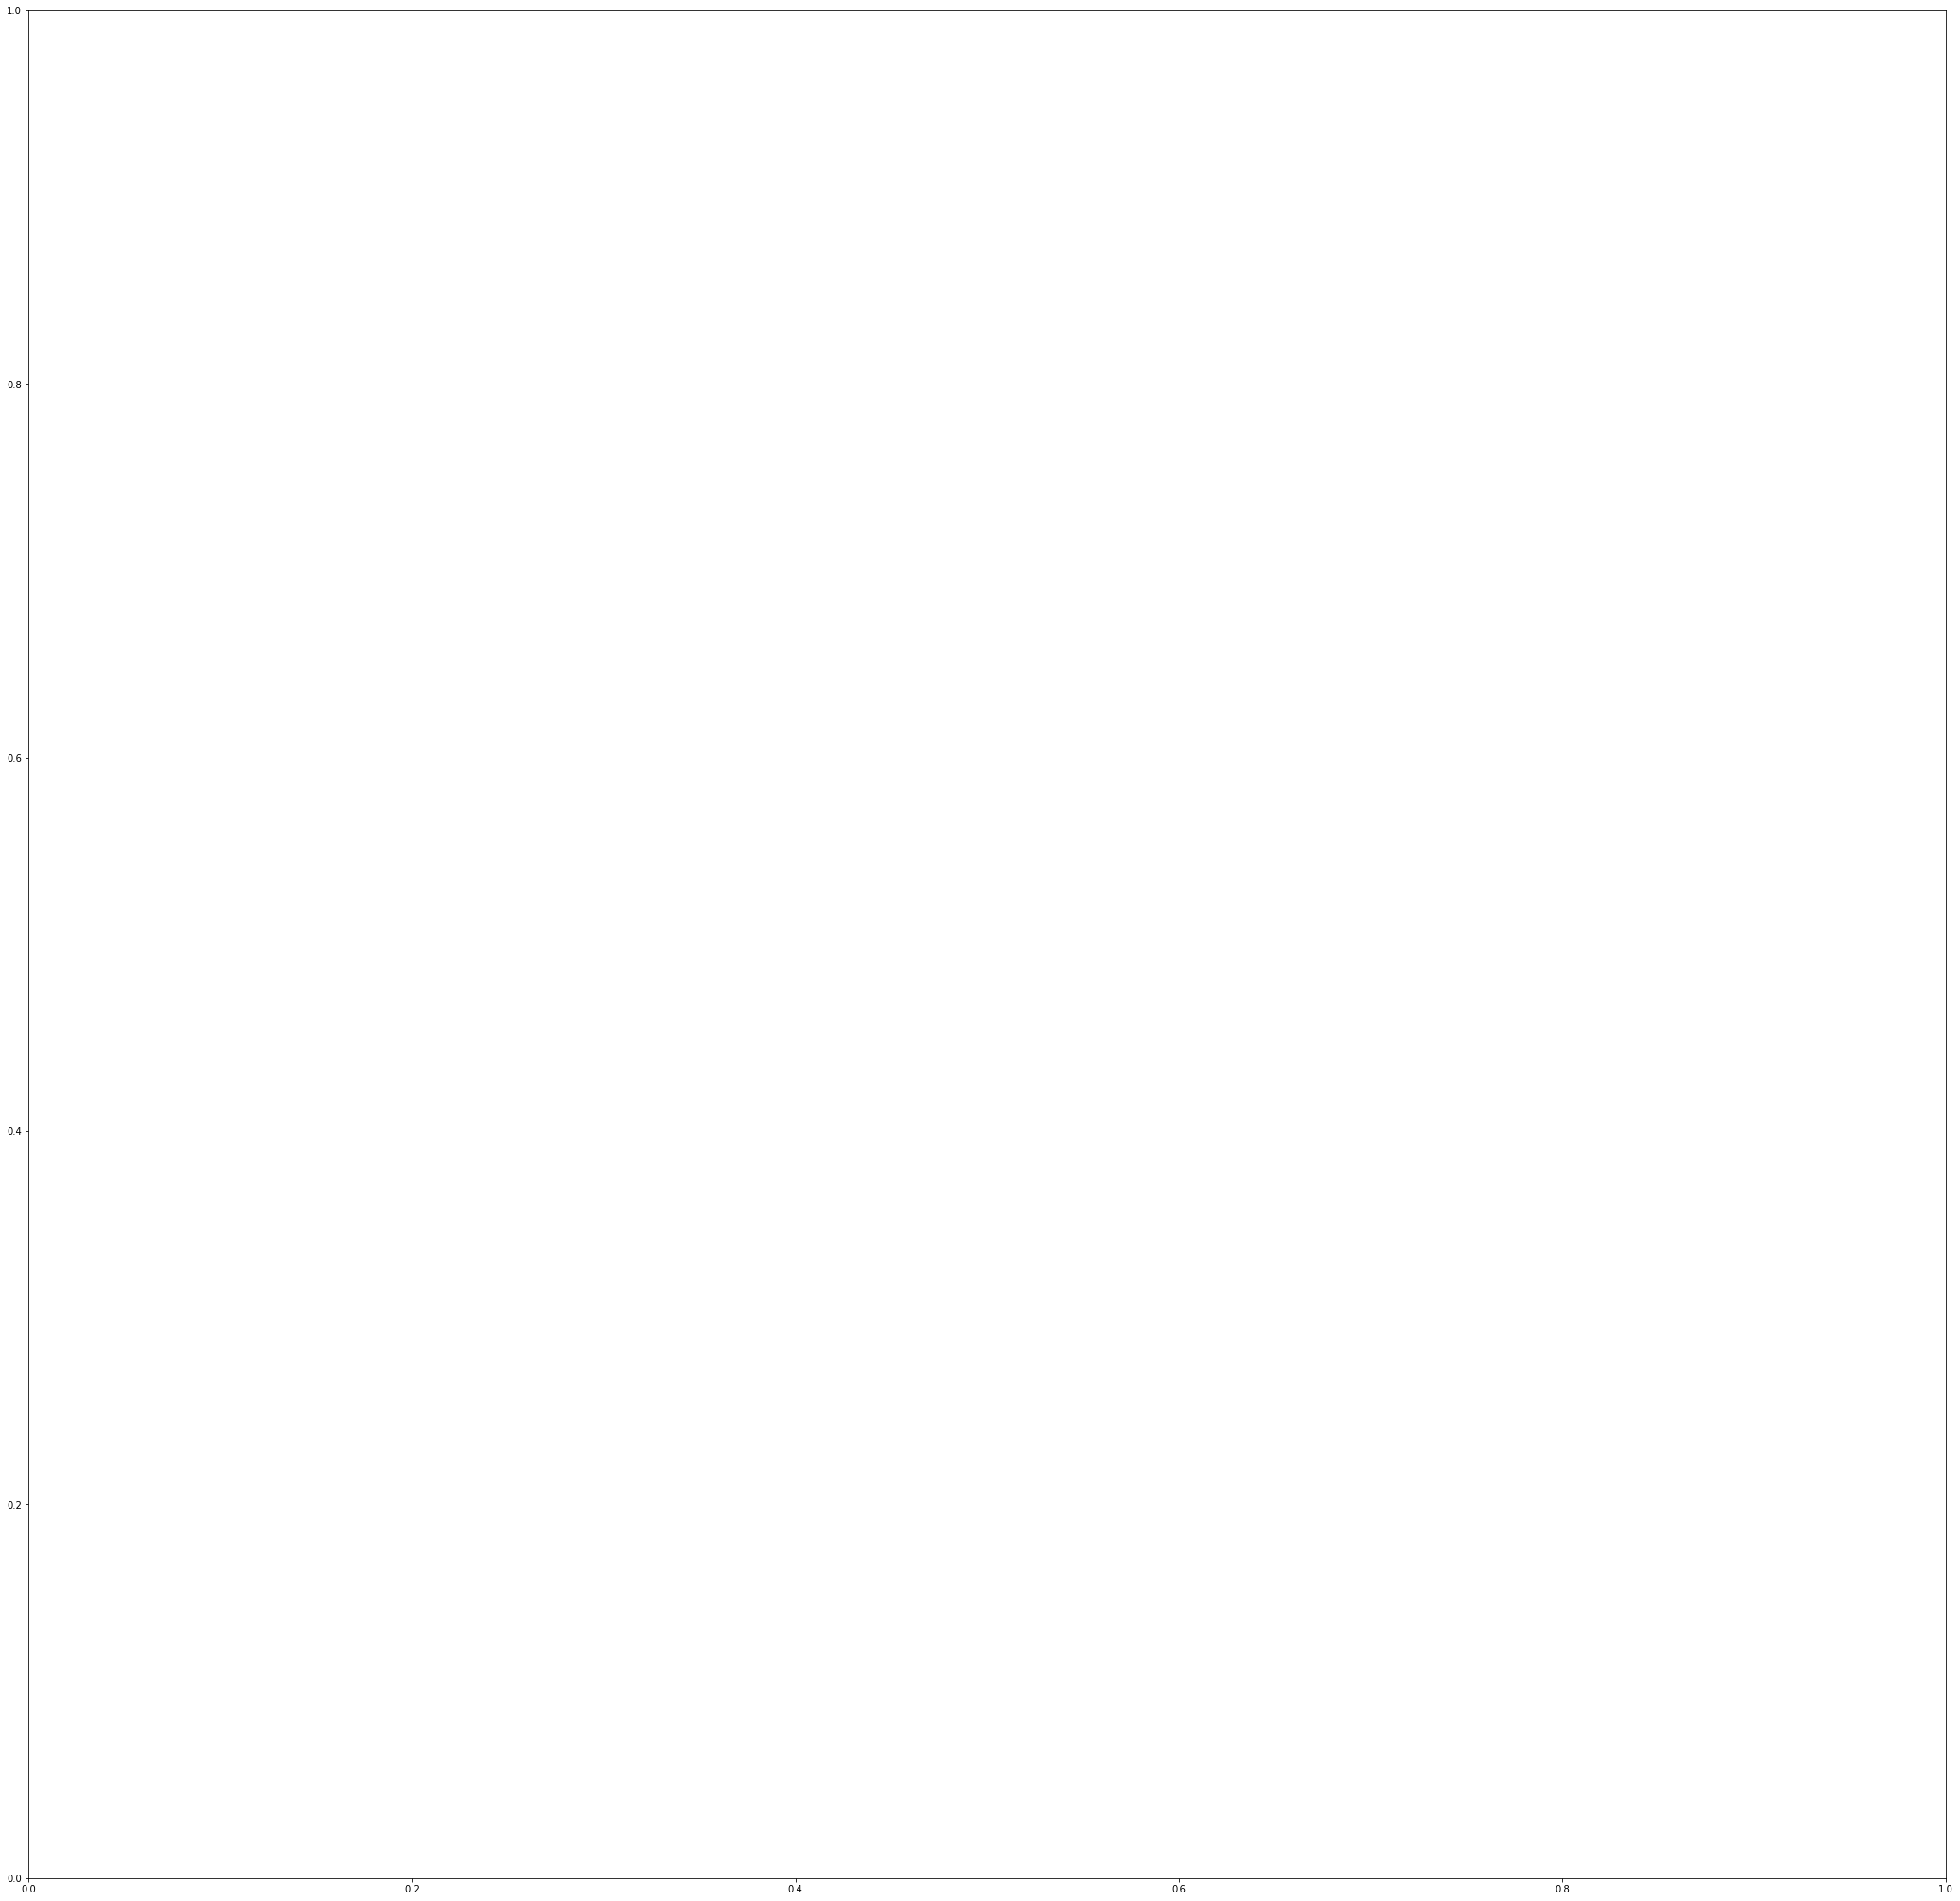

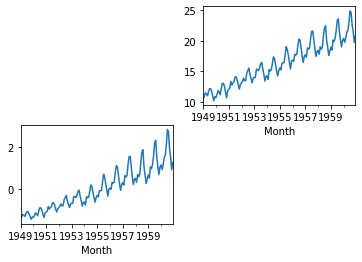

In [41]:
plt.figure(figsize=(80,80))
plt.subplot(2,2,1)
A.plot()
plt.subplot(2,2,2)
B.plot()
plt.subplot(2,2,3)
z.plot()


In [3]:
A.plot()


NameError: name 'A' is not defined

In [1]:
import numpy as np
A_log = np.log(A.Pass)


NameError: name 'A' is not defined

In [44]:
A.Pass.mean()

280.2986111111111

In [45]:
rm = A_log.rolling(window=12).mean()

In [1]:
Q = A_log - rm

NameError: name 'A_log' is not defined

In [49]:
Q1 = Q[~Q.isnull()]

In [50]:
import numpy as np
from statsmodels.tsa.stattools import adfuller
adfuller(Q1)[1]


0.022234630001243844

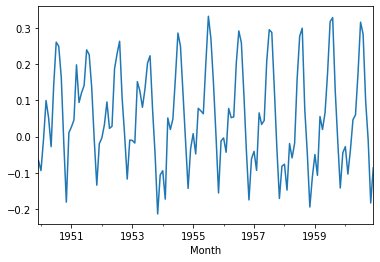

In [51]:
#A.plot()

Q1.plot()

In [52]:
A.shape


(144, 1)

In [53]:
training = A[0:115]
testing = A[115:145]

In [54]:
testing


,Pass
Month,
1958-08-01,505
1958-09-01,404
1958-10-01,359
1958-11-01,310
1958-12-01,337
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396


In [55]:
from statsmodels.tsa.ar_model import AR

In [56]:
model = AR(training).fit()

C:\Users\OJAS KHAPRE\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarnin

In [57]:
pred = model.predict(start="1958-08-01",end="1960-12-01")


In [58]:
pred

1958-08-01    514.096313
1958-09-01    470.062925
1958-10-01    400.628507
1958-11-01    351.595144
1958-12-01    373.041406
1959-01-01    373.466037
1959-02-01    358.348945
1959-03-01    381.994556
1959-04-01    370.555690
1959-05-01    394.558596
1959-06-01    467.570760
1959-07-01    535.478922
1959-08-01    567.938244
1959-09-01    536.162241
1959-10-01    462.125581
1959-11-01    406.048588
1959-12-01    415.648222
1960-01-01    412.516094
1960-02-01    400.075491
1960-03-01    406.543937
1960-04-01    393.996320
1960-05-01    422.303472
1960-06-01    499.734663
1960-07-01    579.722104
1960-08-01    624.567896
1960-09-01    604.655411
1960-10-01    530.216949
1960-11-01    468.670260
1960-12-01    465.382897
Freq: MS, dtype: float64

In [59]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(testing,pred)

35.336411784418665